In [29]:
import data_preprocess as dp
from matplotlib import pyplot as plt
import numpy as np
import data_preprocess as dp

path_arff = open('data/Autism-Adult-Data.arff')
df_original = dp.load_data(path_arff)
df, df_additional = dp.drop_columns(df_original, 'used_app_before', 'country_of_res', 'age_desc', 'result', 'jundice')
df = dp.binary_encoding(df, 'autism_relation', 'ASD', 'gender')
df, df_additional = dp.remove_categorical(df, df_additional, 'ethnicity', 'relation')
df = dp.locate_na_index(df)
df = dp.correct_types(df)
X, x, y = dp.create_training_variables(df)



Loading
Data loaded of length 704!
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'autism_relation', 'country_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'ASD'],
      dtype='object')

Created additional dataframe from dropped

Preprocessing:
Dropped ('used_app_before', 'country_of_res', 'age_desc', 'result', 'jundice') columns

Encoding:
Running encoding on ('autism_relation', 'ASD', 'gender')
Encoded autism_relation
Dropped autism_relation
Encoded ASD
Dropped ASD
Encoded gender
Dropped gender
ethnicity added to additional
ethnicity dropped from dataframe
relation added to additional
relation dropped from dataframe
index 10 has 2 null values
max slice:
   A1_Score A2_Score A3_Score A4_Score A5_Score A6_Score A7_Score A8_Score   
52        1        0        0        0        0        0        0        0  \

   A9_Score A10_Sco

C:\Users\samty\com725-submission\data_preprocess.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_additional[col] = dataframe[col]
C:\Users\samty\com725-submission\data_preprocess.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_additional[col] = dataframe[col]


In [10]:
df_original.ASD.value_counts()

ASD
NO     515
YES    189
Name: count, dtype: int64

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  autism_relation  704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
df_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   used_app_before  704 non-null    object 
 1   country_of_res   704 non-null    object 
 2   age_desc         704 non-null    object 
 3   result           704 non-null    float64
 4   jundice          704 non-null    object 
 5   ethnicity        609 non-null    object 
 6   relation         609 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.6+ KB


C:\Users\samty\AppData\Local\Temp\ipykernel_27484\171158238.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)
C:\Users\samty\AppData\Local\Temp\ipykernel_27484\171158238.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


(<Figure size 2000x1000 with 2 Axes>, <Axes: >)

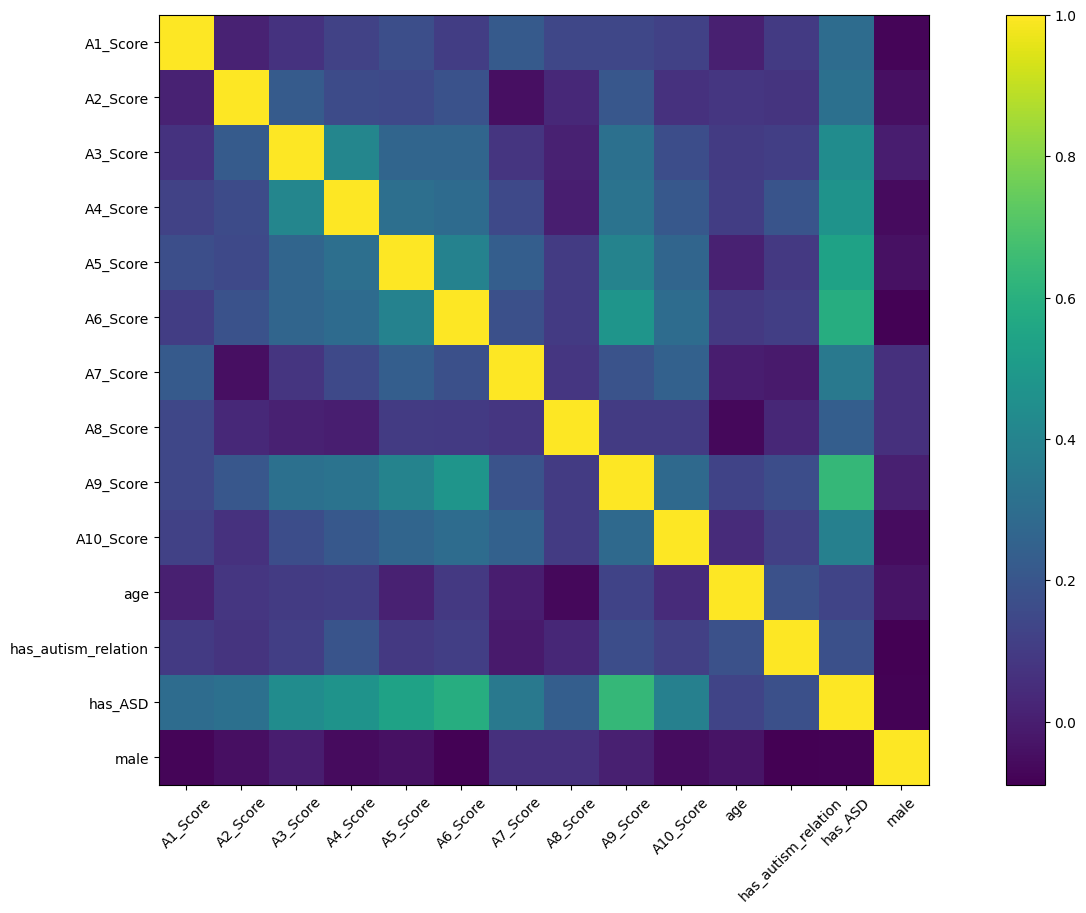

In [12]:
def correlation_matrix(dataframe):
    labels = dataframe.columns.values
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_yticks(np.arange(len(labels)))
    fig.colorbar(ax.imshow(dataframe.corr()))
    ax.imshow(df.corr())
    return fig, ax

correlation_matrix(df)

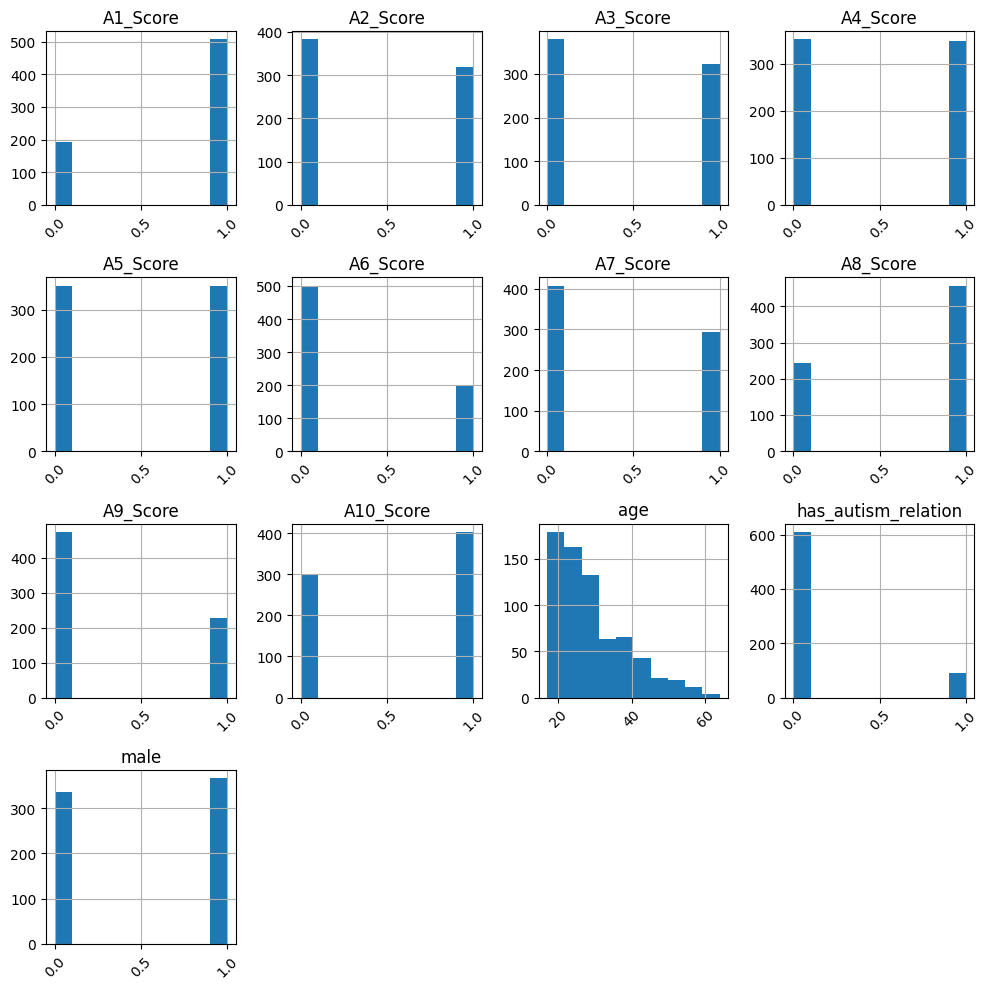

In [13]:
X.hist(xrot=45, figsize=(10,10))
plt.tight_layout()

In [7]:
df_original

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism_relation,country_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,None,no,no,Egypt,no,2.0,18 and more,None,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,None,no,no,Russia,no,7.0,18 and more,None,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [31]:
df['ethnicity'] = df_original['ethnicity']
df.groupby('ethnicity').mean(numeric_only=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,has_autism_relation,has_ASD,male
ethnicity,,,,,,,,,,,,,,
Asian,0.682927,0.276423,0.349593,0.365854,0.463415,0.211382,0.447154,0.682927,0.268293,0.528455,27.455285,0.040650,0.130081,0.585366
Black,0.744186,0.604651,0.395349,0.488372,0.627907,0.348837,0.465116,0.581395,0.465116,0.604651,30.139535,0.116279,0.418605,0.465116
Hispanic,0.923077,0.384615,0.538462,0.384615,0.538462,0.384615,0.384615,0.846154,0.230769,0.461538,31.846154,0.076923,0.384615,0.846154
Latino,0.900000,0.550000,0.550000,0.800000,0.750000,0.200000,0.600000,0.950000,0.400000,0.650000,28.550000,0.400000,0.500000,0.600000
Middle Eastern,0.586957,0.423913,0.434783,0.391304,0.413043,0.163043,0.293478,0.597826,0.173913,0.500000,25.869565,0.097826,0.086957,0.586957
Others,0.700000,0.466667,0.566667,0.500000,0.500000,0.266667,0.500000,0.766667,0.366667,0.733333,28.400000,0.066667,0.300000,0.533333
Pasifika,0.636364,0.363636,0.363636,0.545455,0.363636,0.272727,0.272727,0.636364,0.181818,0.272727,25.545455,0.181818,0.090909,0.545455
South Asian,0.722222,0.305556,0.250000,0.333333,0.416667,0.194444,0.277778,0.666667,0.138889,0.472222,25.777778,0.055556,0.083333,0.444444
Turkish,0.833333,0.833333,0.166667,0.333333,0.500000,0.166667,0.166667,0.833333,0.166667,0.333333,27.500000,0.166667,0.166667,0.666667


In [34]:
df.groupby('has_ASD').mean(numeric_only=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,has_autism_relation,male
has_ASD,,,,,,,,,,,,,
0,0.642578,0.359375,0.326172,0.355469,0.335938,0.123047,0.312500,0.583984,0.144531,0.458984,28.414062,0.093750,0.546875
1,0.941799,0.708995,0.820106,0.883598,0.941799,0.724868,0.703704,0.835979,0.814815,0.888889,31.306878,0.227513,0.455026


In [35]:
df['country_of_res'] = df_original['country_of_res']
df.groupby('country_of_res').mean(numeric_only=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,has_autism_relation,has_ASD,male
country_of_res,,,,,,,,,,,,,,
Afghanistan,0.307692,0.384615,0.538462,0.615385,0.461538,0.230769,0.461538,0.538462,0.461538,0.384615,30.307692,0.307692,0.153846,0.538462
AmericanSamoa,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1.000000,31.000000,0.000000,0.500000,1.000000
Angola,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,18.000000,0.000000,0.000000,1.000000
Argentina,1.000000,0.500000,0.500000,0.000000,0.500000,0.000000,1.000000,1.000000,0.500000,1.000000,18.500000,0.000000,0.500000,0.500000
Armenia,1.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,29.000000,0.500000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0.585366,0.439024,0.378049,0.329268,0.329268,0.109756,0.268293,0.646341,0.060976,0.475610,23.390244,0.036585,0.036585,0.487805
United Kingdom,0.792208,0.571429,0.610390,0.662338,0.467532,0.389610,0.519481,0.545455,0.402597,0.701299,35.402597,0.220779,0.376623,0.519481
United States,0.867257,0.663717,0.592920,0.690265,0.628319,0.389381,0.486726,0.725664,0.442478,0.637168,32.265487,0.203540,0.469027,0.513274


C:\Users\samty\AppData\Local\Temp\ipykernel_27484\3500047339.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


<BarContainer object of 67 artists>

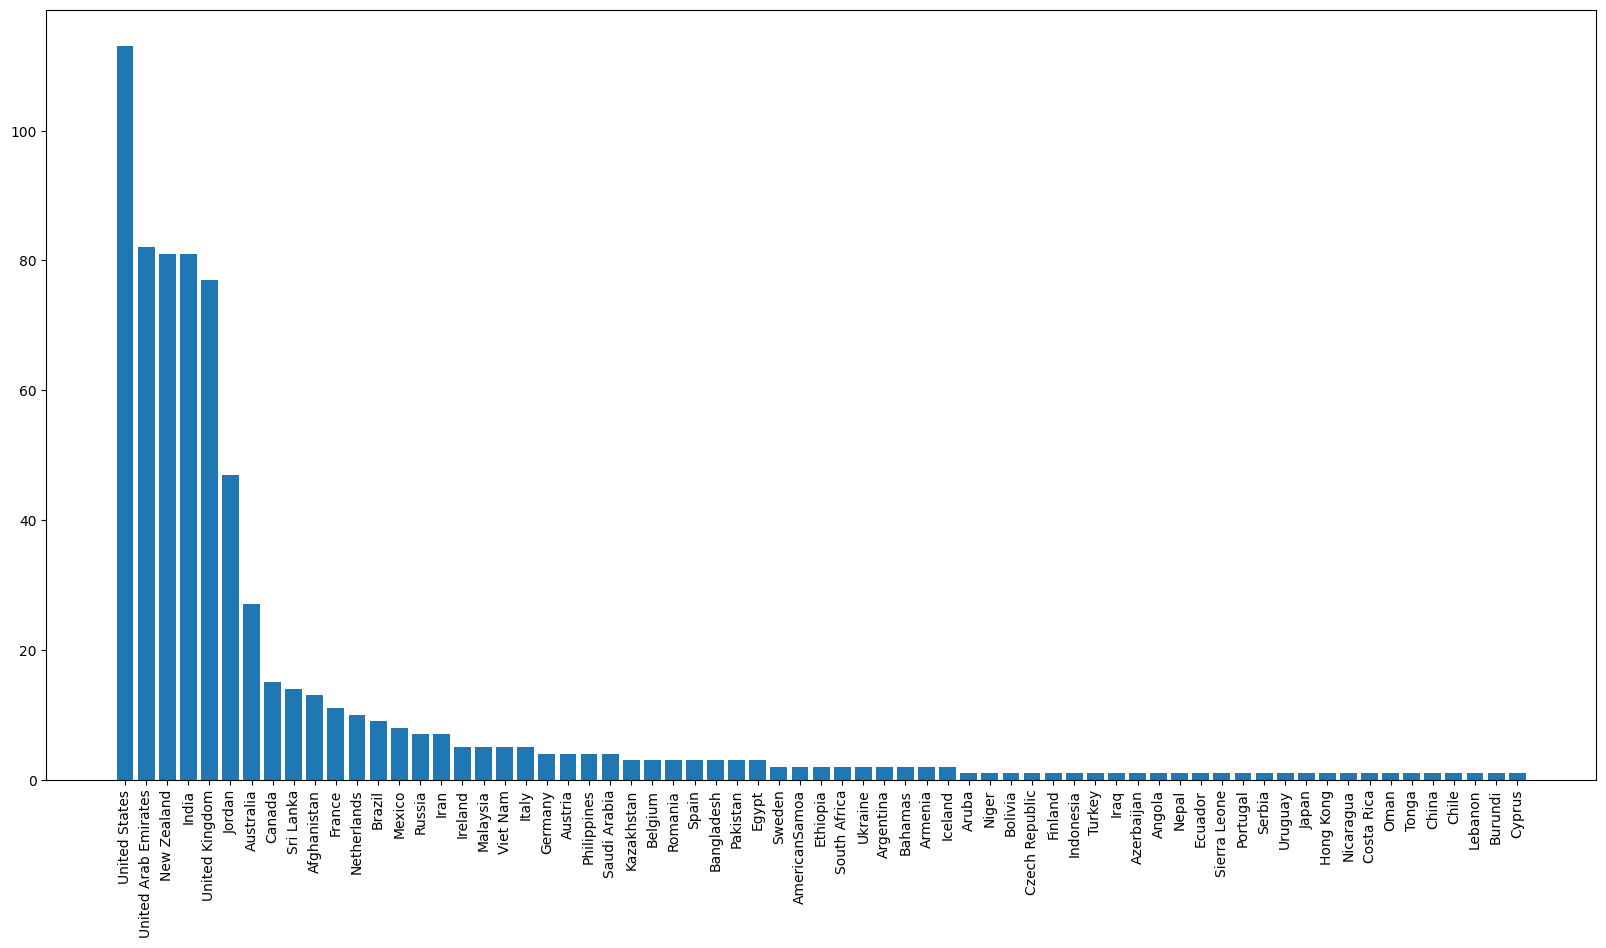

In [17]:
country_counts = df_original['country_of_res'].value_counts()
fig, ax = plt.subplots(figsize=(20, 10))

x = []
for country in country_counts.index:
    x.append(country)
y = []
for value in country_counts:
    y.append(value)

ax.set_xticklabels(x, rotation=90)

plt.bar(x, y)


In [36]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,has_autism_relation,has_ASD,male,ethnicity,country_of_res
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,White-European,United States
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,Latino,Brazil
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,Latino,Spain
3,1,1,0,1,0,0,1,1,0,1,35,1,0,0,White-European,United States
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,None,Egypt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,0,1,0,White-European,Russia
700,1,0,0,0,0,0,0,1,0,1,34,0,0,1,Hispanic,Mexico
701,1,0,1,1,1,0,1,1,0,1,24,0,1,0,None,Russia
702,1,0,0,1,1,0,1,0,1,1,35,0,0,1,South Asian,Pakistan
